# Illinois Analysis
In this notebook, we do a deep dive into Illinois, for which we have the most feature-rich data.
We first train some basic algorithms, including KNN and Linear Regression, then we compare to that the result of XGBoost.
The features are School-level demographic data, and the targets are SAT Math scores.

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



In [7]:
df19 = pd.read_csv("../data/IL19/IL19_Combined_Ed_Demographic.csv")
df19.columns

Index(['RCDTS', 'Type', 'School Name', 'District', 'City', 'County',
       'District Type', 'School Type', 'Grades Served',
       'Summative Designation', 'Summative Designation: Student Group(s)',
       'Title 1 Status', '# Student Enrollment',
       '% Student Enrollment - White',
       '% Student Enrollment - Black or African American',
       '% Student Enrollment - Hispanic or Latino',
       '% Student Enrollment - Asian',
       '% Student Enrollment - Native Hawaiian or Other Pacific Islander',
       '% Student Enrollment - American Indian or Alaska Native',
       '% Student Enrollment - Two or More Races',
       '% Student Enrollment - Children with Disabilities',
       '% Student Enrollment - EL', '% Student Enrollment - IEP',
       '% Student Enrollment - Low Income', '% Student Enrollment - Homeless',
       'Total Number of School Days', 'Student Attendance Rate',
       'Student Chronic Truancy Rate', 'High School Dropout Rate - Total',
       'Avg Class Size - 

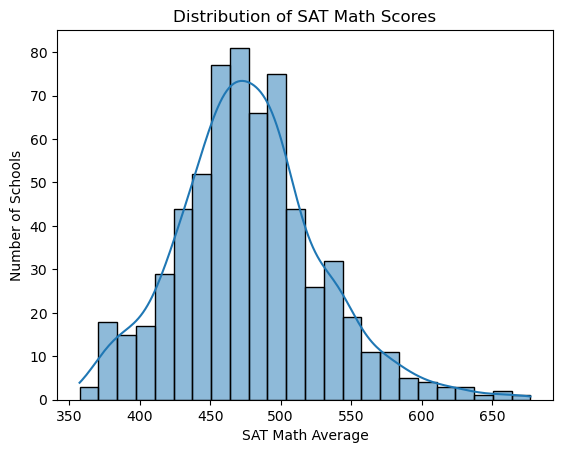

In [9]:
sns.histplot(df19['SAT Math Average'], kde=True)
plt.title("Distribution of SAT Math Scores")
plt.xlabel("SAT Math Average")
plt.ylabel("Number of Schools")
plt.show()


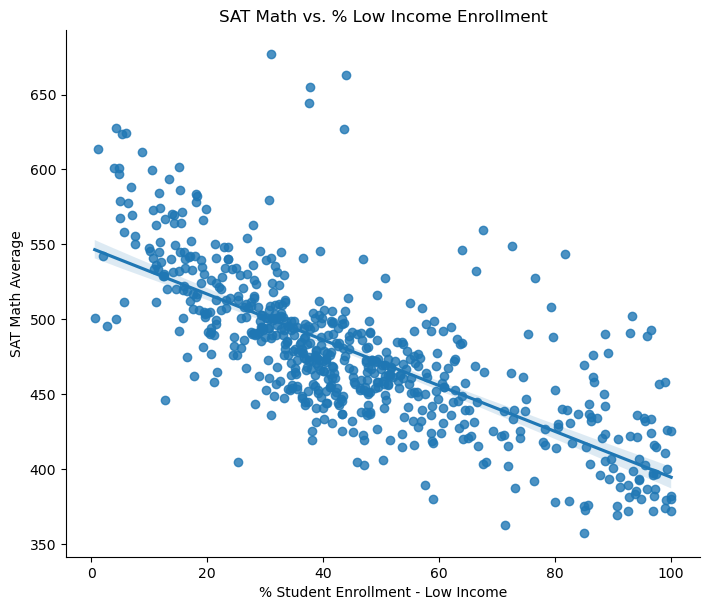

In [11]:
sns.lmplot(data=df19, x='% Student Enrollment - Low Income', y='SAT Math Average', height=6, aspect=1.2)
plt.title("SAT Math vs. % Low Income Enrollment")
plt.show()


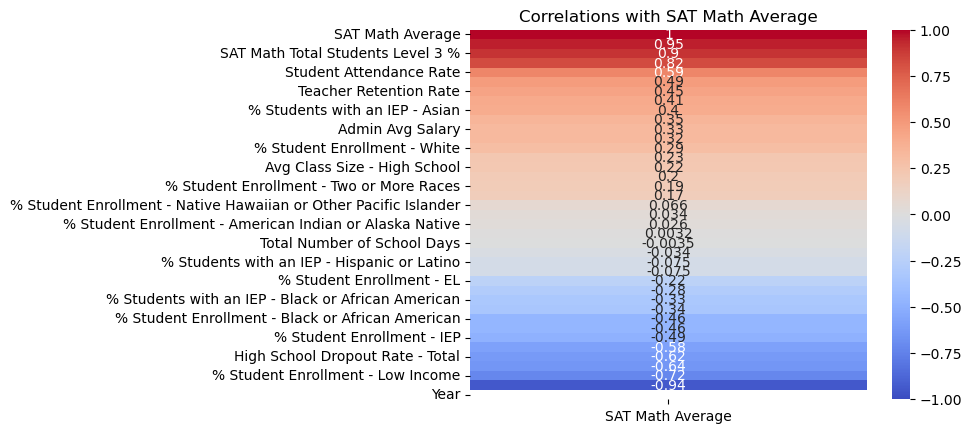

In [15]:

# Filter to numeric columns
numeric_cols = df19.select_dtypes(include=[np.number])

# Compute correlations
corr = numeric_cols.corr()

# Plot heatmap
sns.heatmap(corr[['SAT Math Average']].sort_values(by='SAT Math Average', ascending=False),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlations with SAT Math Average")
plt.show()


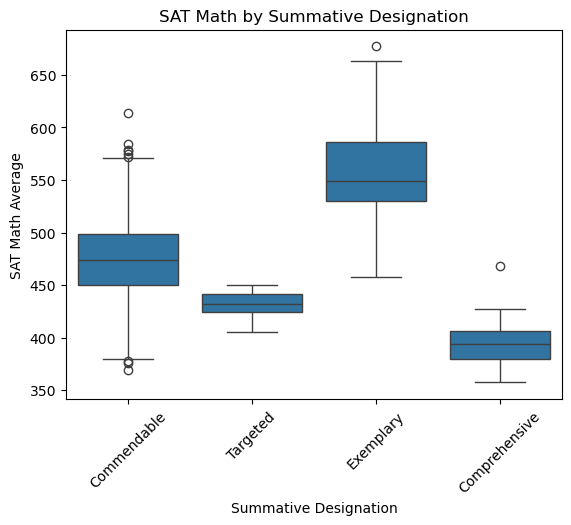

In [17]:
sns.boxplot(data=df19, x='Summative Designation', y='SAT Math Average')
plt.xticks(rotation=45)
plt.title("SAT Math by Summative Designation")
plt.show()


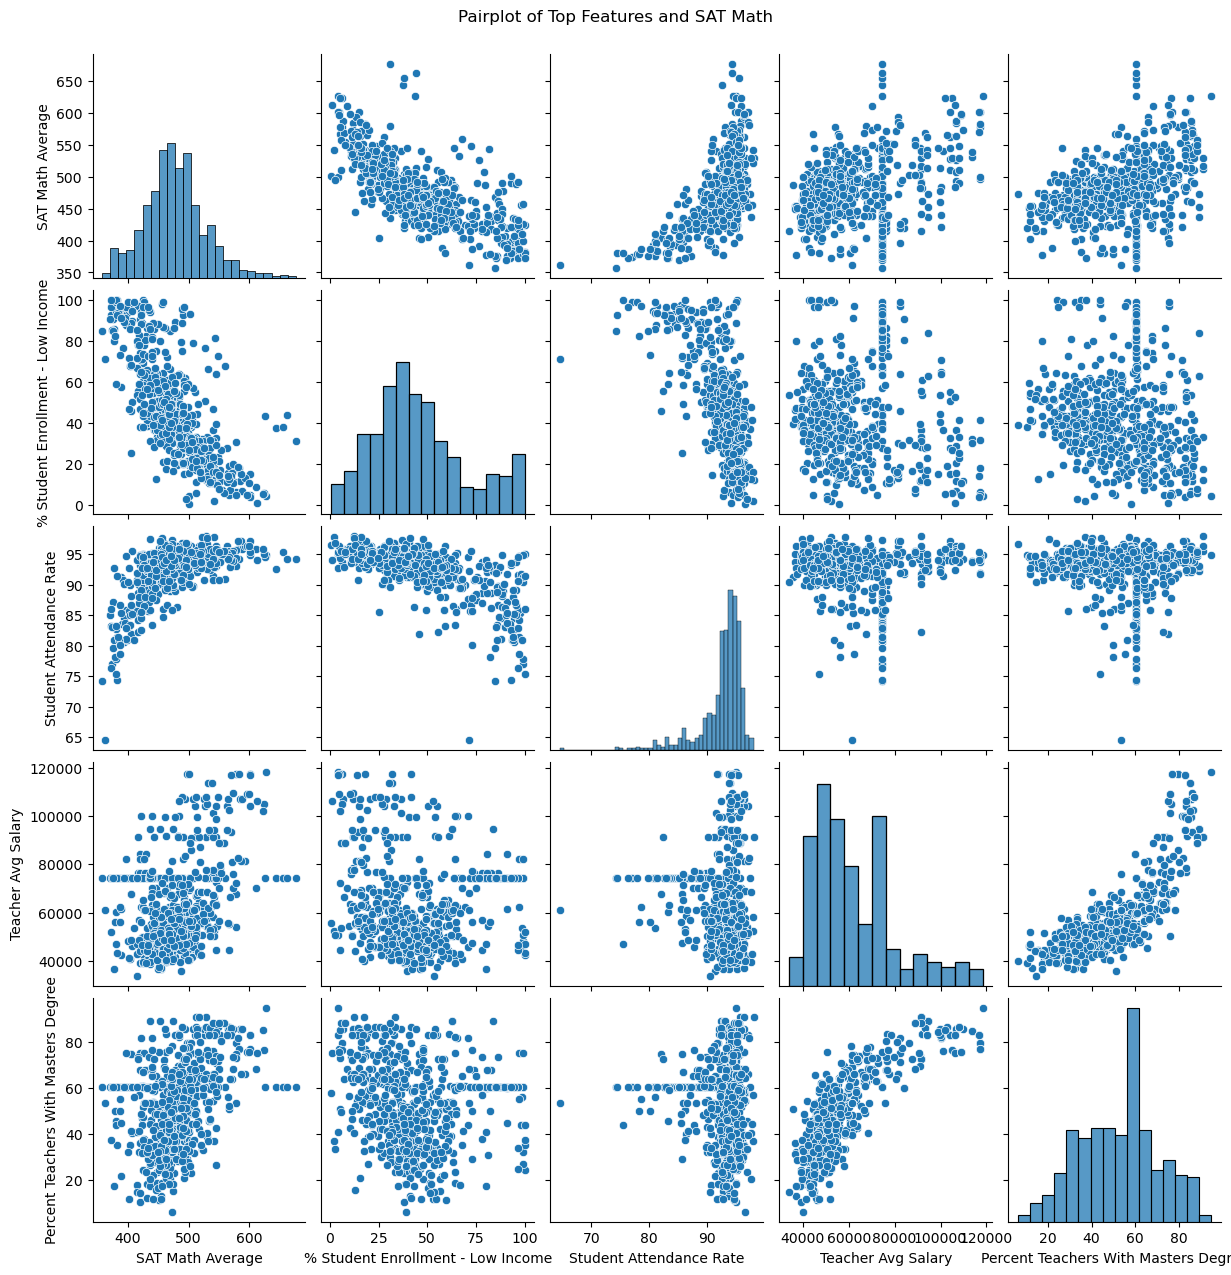

In [19]:
top_feats = [
    'SAT Math Average',
    '% Student Enrollment - Low Income',
    'Student Attendance Rate',
    'Teacher Avg Salary',
    'Percent Teachers With Masters Degree'
]

sns.pairplot(df19[top_feats].dropna())
plt.suptitle("Pairplot of Top Features and SAT Math", y=1.02)
plt.show()


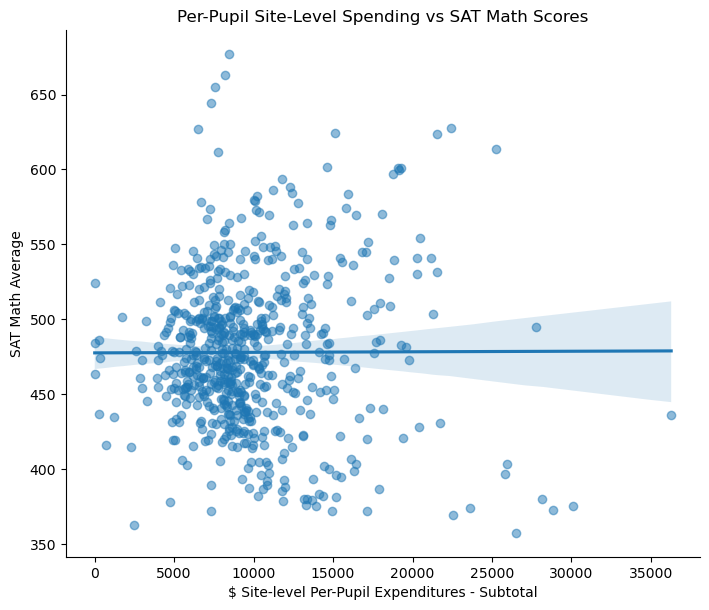

In [21]:
sns.lmplot(
    data=df19,
    x='$ Site-level Per-Pupil Expenditures - Subtotal',
    y='SAT Math Average',
    height=6,
    aspect=1.2,
    scatter_kws={'alpha': 0.5}
)
plt.title("Per-Pupil Site-Level Spending vs SAT Math Scores")
plt.show()


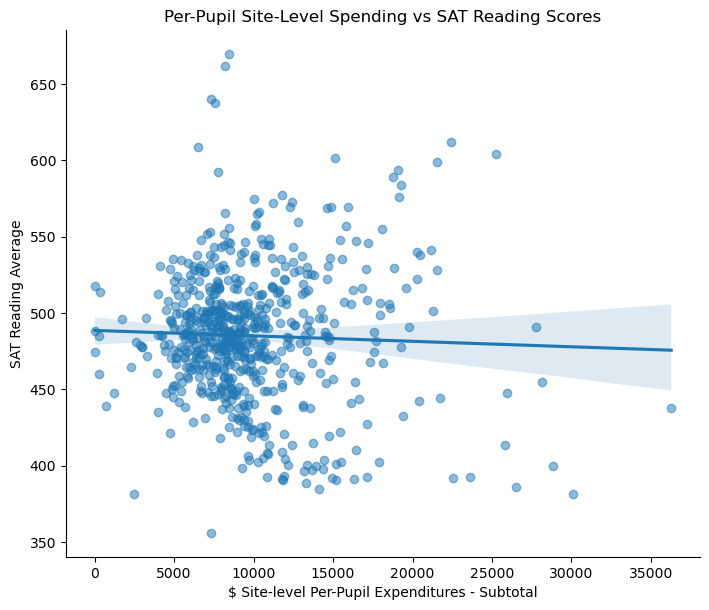

In [23]:
sns.lmplot(
    data=df19,
    x='$ Site-level Per-Pupil Expenditures - Subtotal',
    y='SAT Reading Average',
    height=6,
    aspect=1.2,
    scatter_kws={'alpha': 0.5}
)
plt.title("Per-Pupil Site-Level Spending vs SAT Reading Scores")
plt.show()


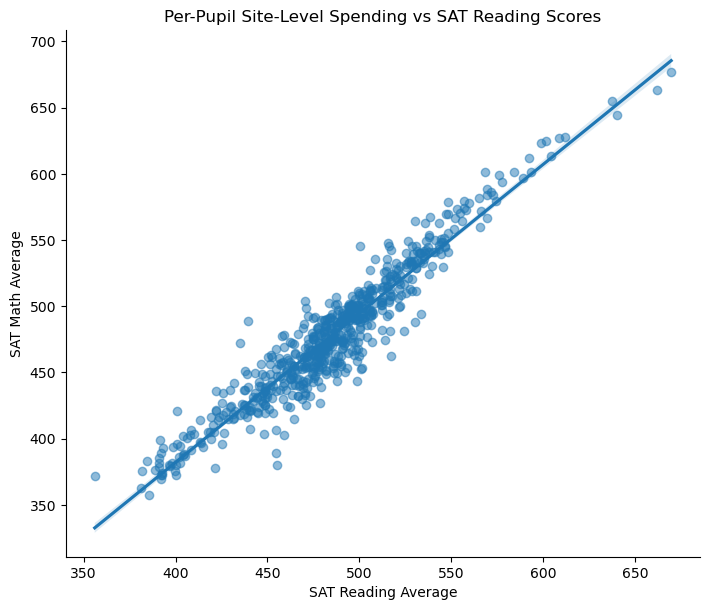

In [25]:
sns.lmplot(
    data=df19,
    x='SAT Reading Average',
    y='SAT Math Average',
    height=6,
    aspect=1.2,
    scatter_kws={'alpha': 0.5}
)
plt.title("Per-Pupil Site-Level Spending vs SAT Reading Scores")
plt.show()


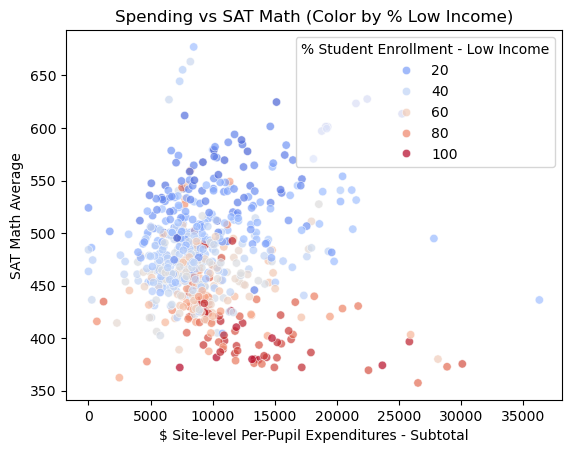

In [27]:
sns.scatterplot(
    data=df19,
    x='$ Site-level Per-Pupil Expenditures - Subtotal',
    y='SAT Math Average',
    hue='% Student Enrollment - Low Income',
    palette='coolwarm',
    alpha=0.7
)
plt.title("Spending vs SAT Math (Color by % Low Income)")
plt.show()


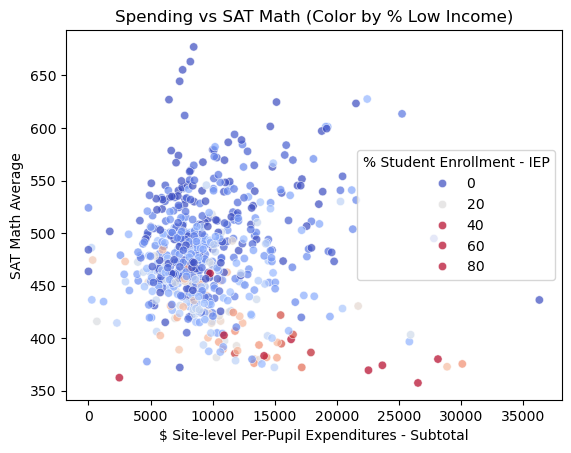

In [32]:
sns.scatterplot(
    data=df19,
    x='$ Site-level Per-Pupil Expenditures - Subtotal',
    y='SAT Math Average',
    hue='% Student Enrollment - IEP',
    palette='coolwarm',
    hue_norm=(10, 30),  # Adjust based on your data distribution
    alpha=0.7
)
plt.title("Spending vs SAT Math (Color by % Low Income)")
plt.show()



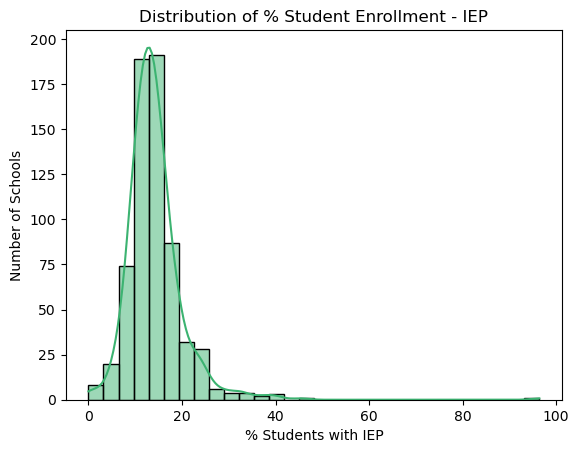

In [31]:
sns.histplot(
    data=df19,
    x='% Student Enrollment - IEP',
    bins=30,
    kde=True,
    color='mediumseagreen'
)
plt.title("Distribution of % Student Enrollment - IEP")
plt.xlabel("% Students with IEP")
plt.ylabel("Number of Schools")
plt.show()
